In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

def find_roots_bisect(r, msf, tol=1e-8):
    roots = []

    def f(x):
        return np.interp(x, r, msf)

    for i in range(len(r) - 1):
        y1, y2 = msf[i], msf[i+1]
        a, b = r[i], r[i+1]

        if y1 == 0:
            roots.append(a)
        elif y1 * y2 < 0:
            root = bisect(f, a, b, xtol=tol)
            roots.append(root)

    roots = np.array(sorted(roots))
    if len(roots) > 1:
        unique = [roots[0]]
        for x in roots[1:]:
            if abs(x - unique[-1]) > 1e-5:
                unique.append(x)
        roots = np.array(unique)

    return roots

In [2]:
def plot_msf(fname, title, outfile):
    data = np.loadtxt(fname)
    r = data[:,0]
    msf = data[:,1]

    roots = find_roots_bisect(r, msf)
    print(title, "roots =", roots)

    fig = plt.figure(figsize=(5,4), constrained_layout=True)

    plt.plot(r, msf, 'k', linewidth=2)
    plt.axhline(0, color='r', linestyle='--')

    colors = ['blue', 'green', 'purple', 'orange']
    for i, rr in enumerate(roots):
        plt.scatter(rr, 0,
                    s=20,
                    color=colors[i % len(colors)],
                    zorder=5,
                    label=rf"$r_{{{i+1}}} \approx {rr:.3f}$")

    plt.xlim(r.min(), r.max())
    plt.xlabel(r"$r$")
    plt.ylabel(r"$\Lambda(r)$")
    plt.title(title)

    if len(roots) > 0:
        plt.legend()

    plt.tick_params(which='both', direction='in', top=True, right=True)
    plt.grid(False)

    fig.savefig(outfile, format="pdf", dpi=300)
    plt.show()

x-diffusion roots = []


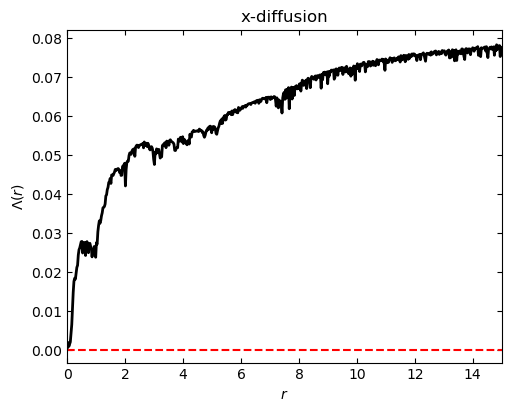

y-diffusion roots = [0.00576508]


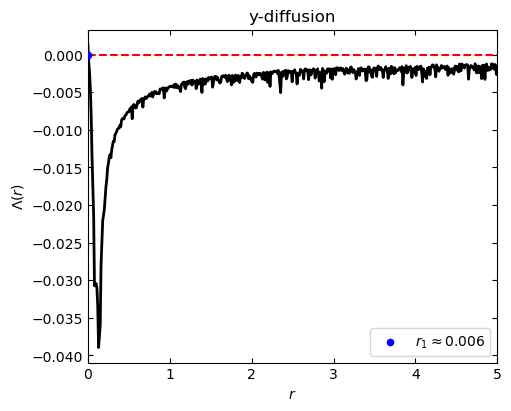

z-diffusion roots = [0.00159276]


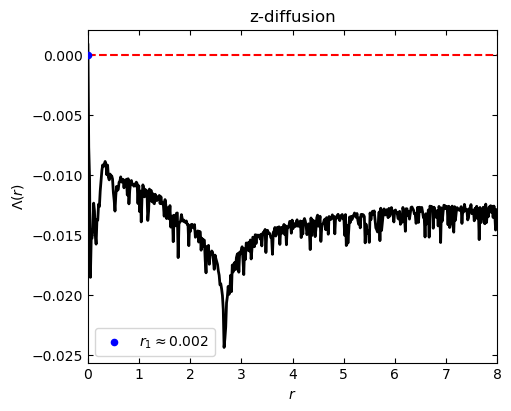

xy-diffusion roots = [0.00420067]


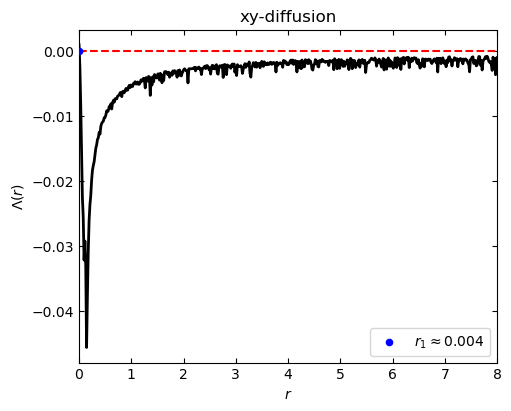

xz-diffusion roots = [0.00208514 0.17323134]


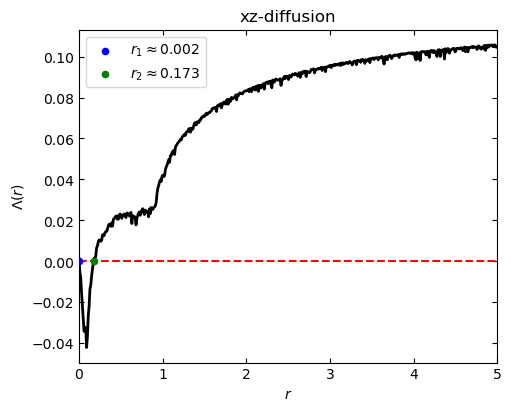

yz-diffusion roots = [0.00176504]


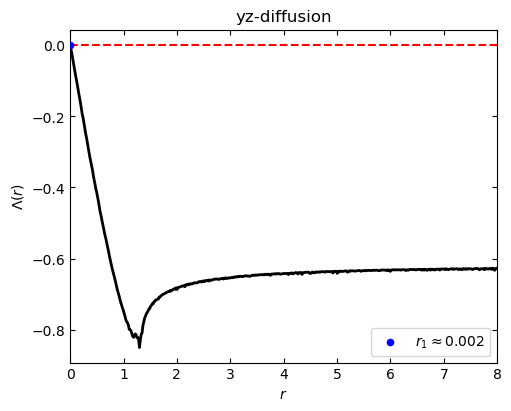

xyz-diffusion roots = [0.00105305]


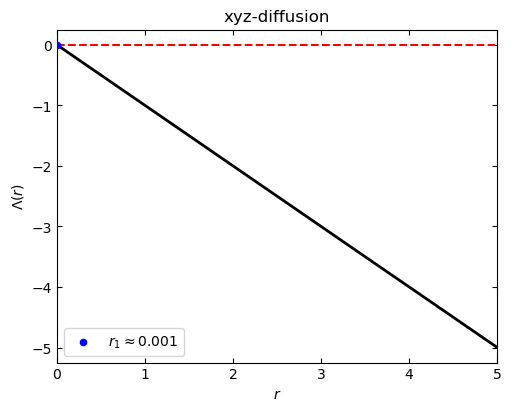

In [3]:
plot_msf("msf_HP_x.txt",   "x-diffusion",   "HP_x_diffusion.pdf")
plot_msf("msf_HP_y.txt",   "y-diffusion",   "HP_y_diffusion.pdf")
plot_msf("msf_HP_z.txt",   "z-diffusion",   "HP_z_diffusion.pdf")

plot_msf("msf_HP_xy.txt",  "xy-diffusion",  "HP_xy_diffusion.pdf")
plot_msf("msf_HP_xz.txt",  "xz-diffusion",  "HP_xz_diffusion.pdf")
plot_msf("msf_HP_yz.txt",  "yz-diffusion",  "HP_yz_diffusion.pdf")

plot_msf("msf_HP_xyz.txt", "xyz-diffusion", "HP_xyz_diffusion.pdf")